> ### EEE3314: Introduction to Artificial Intelligence

# Assignment \# I: Regression

### *Assignement Instructions:*
- **Due date**: 11:55 PM, Oct. 27 (Sun), 2024
- **File name**: [ID_Name_HW1.ipynb]
- Complete project1.py with comments describing your implementation after reading instructions in this file.
- **Respond to all the questions that requires you to answer with markdown, theoretically and empirically**

In [126]:
import time
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from project1 import *

print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2024-10-26 19:23:59.927012


In [127]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Problem statement

#### In this project, **we will observe the overfitting problem in machine learning and explore the use of regularization techniques to adress it**. From P1 to P5, you will implement various regression methods, including *Linear*, *Ridge*, *Lasso*, and *Elastic Net*. In P6, you will analyze overfitting and the effects of regularization based on your implementations.

#### The training set ($\texttt{crime-train.csv}$) consists of statistics of local crime for 1,595 communities. Our goal is to estimate the crime rate ($\texttt{ViolentCrimesPerPop}$) using 95 features, including the size of the police force or the percentage of children that graduate high school. Detailed descriptions of the features are avaialbe at the following website: http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.names.

#### Let's estimate regression models using training samples to predict the crime rate, and evaluate them on the test set ($\texttt{crime-test.csv}$). Suppose that the number of featrues and other statistics for the test set are exactly the same as those for the training set.

**Note #1**:
You can use ```linalg.inv```, ```transpose```, ```dot```, ```sum```, ```concatenate```, ```random```, ```min``` and ```max``` provided by ```Numpy```. Other mehtods (e.g., ```sklearn.linear_model``` or equivalent) should not be used. You will get no credit otherwise. 

**Note #2**: For handling the intercept term, refer the lecture note.  


**Note #3**: In .py file, refer to class or function descriptions to implement them.

**Note #4**: We will use unnormalized features. Please refer the lecture note.

### P1. Loading data (5 point)

P1.1 Implement the ```Dataset``` class to read, display, and employ data samples. Describe your implementation. (5 point)

### P2. Linear Regression (25 point)

P2.1 Implement the ```RSSloss``` function and ```plot_loss_history``` function in ```Regressor``` class, and describe your implementation. (5 point)

P2.2 Implement the ```LinearRegressor``` class and ```learning_with_coordinate_descent``` function in the class, and describe your implementation. Below is detailed descriptions for the coordinate descent algorithm. (5 point)
> **Convergence condition**: Stop the iteration if $||\hat w_t - \hat w_{t+1}||_\infty < \tau$, where $\hat w_t$  is estimated coefficients at time $t$. $t$ is a number of iteration, and $\tau $ is a tolerance. Note that the infinity norm of a vector ${\bf{x}}=(x_1,x_2,\dots,x_n)$ is defined as $||{\bf{x}}||_\infty = max(|x_1|,|x_2|,\dots,|x_n|)$.
>
> **Loss function**: RSS
>
> **Initialization**: Set all weight values (including the bias term) to random Gaussian with mean of 0 and standard deviation of 1 $\left( \mathcal{N}(0, 1) \right)$.
>
> Pick the next coordinate squentially (i.e., $0, 1, 2, \dots$).

P2.3 Implement the ```learning_with_gradient_descent``` function in the ```LinearRegressor``` class, and describe your implementation. Refer to the algorithm in the lecture note. (5 point)

P2.4 Implement the ```learning_with_closed_form``` function in the ```LinearRegressor``` class, and describe your implementation. (5 point)

### P3. Ridge Regression (15 point)

P3.1 Implement the ```RidgeRegressor``` class and ```learning_with_coordinate_descent``` function in the class, and describe your implementation. (5 point)

P3.2 Implement the ```learning_with_gradient_descent``` function in the ```RidgeRegressor``` class, and describe your implementation. (5 point)

P3.3 Implement the ```learning_with_closed_form``` function in the ```RidgeRegressor``` class, and describe your implementation. (5 point)

### P4. Lasso Regression (5 point)

P4.1 Implement the ```LassoRegressor``` class, and describe your implementation. Suppose that other conditions are the same as **P2**. Note that the regularization part is only different from Ridge regressior. (5 point)

### P5. Elastic Regression (10 point)

P5.1 Implement the ```ElasticRegressor``` class, and describe your implementation.\
Note that **you should write the derivation process of threshold in your answer.** (10 point)

### P6. Analysis (45 point)

P6.1 Observe training and test errors over the number of train data. Discuss the effect of the number of dataset. (5 point)

P6.2 Observe training and test errors over the regressor. Compare the linear regressor with the others and discuss the effect of regularization. If some empirical results are different from way you expected, perform toy experments to demonstrate what you're thinking for the reason. (10 point)

P6.3 Observe the magnitude of the coefficients across the regressors. Discuss the effect of regularization. (10 point)

P6.4 Explain and compare three regression methods (Ridge, Lasso, and Elastic Net). (10 point)

P6.5 Observe training and test errors over the value of $\lambda$. Discuss the effect of the tuning parameter $\lambda$. (10 point)

---

### P1 Loading data (5 point)

#### P1.1 Implement the ```Dataset``` class to read, display, and employ data samples. Describe your implementation. (5 point)

Answer here

In [128]:
data_path = 'crime-train.csv'
dataset = Dataset(data_path)
features = dataset.features

   population  householdsize  agePct12t21  agePct12t29  agePct16t24  \
0       -0.45          -1.85        -1.06         0.67         0.08   
1       -0.45          -0.27        -0.22        -0.17        -0.34   
2       -0.14           1.87         0.55         0.04         0.02   
3       -0.38           0.53        -0.28        -0.79        -0.64   
4       -0.30          -1.12        -0.74        -0.10        -0.40   

   agePct65up  numbUrban  pctUrban  medIncome  pctWWage  ...  PctForeignBorn  \
0       -0.85      -0.34      0.68      -0.24      0.88  ...           -0.02   
1       -0.58      -0.50     -1.57      -0.29      0.12  ...           -0.33   
2       -1.19      -0.03      0.68       1.05      1.81  ...           -0.11   
3       -0.35      -0.34      0.46       0.66      0.88  ...           -0.46   
4       -0.30      -0.19      0.68       0.76      0.67  ...            2.10   

   PctBornSameState  PctSameHouse85  PctSameCity85  PctSameState85  LandArea  \
0           

In [162]:
X, y = dataset.parse_data(features=dataset.features)
print(f"shape of X: {X.shape}, shape of y: {y.shape}")
print(X)
print(y)

shape of X: (1595, 97), shape of y: (1595,)
[[ 1.   -0.45 -1.85 ...  1.26 -0.39  0.67]
 [ 1.   -0.45 -0.27 ... -0.62 -0.39  0.43]
 [ 1.   -0.14  1.87 ...  0.52 -0.39  0.12]
 ...
 [ 1.    0.81 -0.57 ...  0.08  3.4   0.23]
 [ 1.    0.18  0.28 ...  0.73  0.52  0.19]
 [ 1.    1.12  1.93 ... -0.49  3.77  0.48]]


---

### P2. Linear Regression (20 point)
#### P2.1 Implement the ```RSSloss``` function and ```plot_loss_history``` function in ```Regressor``` class, and describe your implementation. (5 point)

Answer here

#### P2.2 Implement the ```LinearRegressor``` class, and describe yout implementation. Below is detailed descriptions for the coordinate descent algorithm. (10 point)
> **Convergence condition**: Stop the iteration if $||\hat w_t - \hat w_{t+1}||_\infty < \tau$, where $\hat w_t$  is estimated coefficients at time $t$. $t$ is a number of iteration, and $\tau (=10^{-3})$ is a tolerance. Note that the infinity norm of a vector ${\bf{x}}=(x_1,x_2,\dots,x_n)$ is defined as $||{\bf{x}}||_\infty = max(|x_1|,|x_2|,\dots,|x_n|)$.
>
> **Loss function**: RSS
>
> **Initialization**: Set all weight values (including the bias term) to random Gaussian with mean of 0 and standard deviation of 1 $\left( \mathcal{N}(0, 1) \right)$.
>
> Pick the next coordinate squentially (i.e., $0, 1, 2, \dots$).

Answer here

Time elapsed: 2.735715389251709
Final loss: 1.1120449930206417


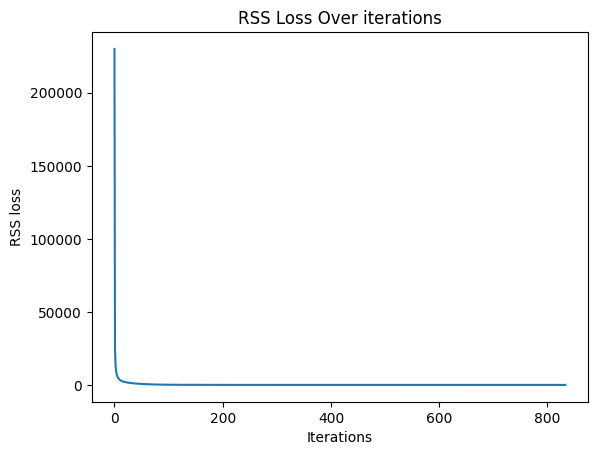

In [130]:
linear = LinearRegressor(tau=1e-3, dim=X.shape[1], lr=1e-5)

time_start = time.time()
linear.learning_with_coordinate_descent(X, y)
print(f"Time elapsed: {time.time() - time_start}")
print(f"Final loss: {linear.losses[-1]}")
linear.loss_history()

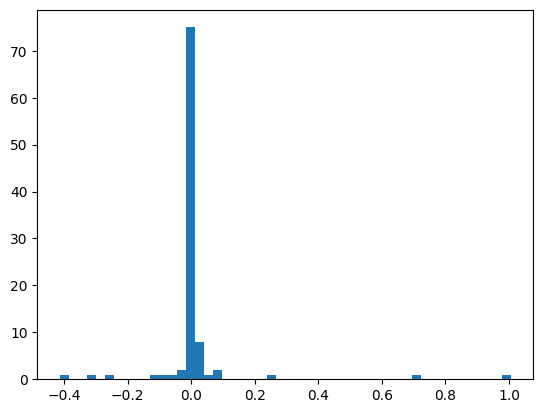

In [131]:
# print(linear.weight_coordinate_descent)
plt.hist(linear.weight_coordinate_descent, bins=50)
plt.show()

P2.3 Implement the ```learning_with_gradient_descent``` function in the ```LinearRegressor``` class, and describe your implementation. Refer to the algorithm in the lecture note. (5 point)

answer here

Time elapsed: 0.05861520767211914
Final loss: 465.5344240805734


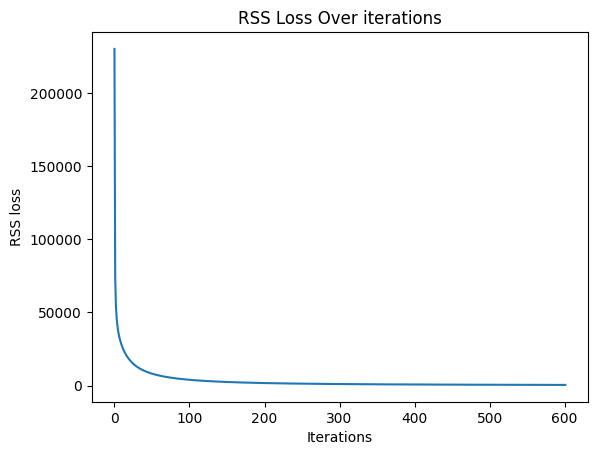

In [132]:
time_start = time.time()
linear.learning_with_gradient_descent(X, y)
print(f"Time elapsed: {time.time() - time_start}")
print(f"Final loss: {linear.losses[-1]}")
linear.loss_history()

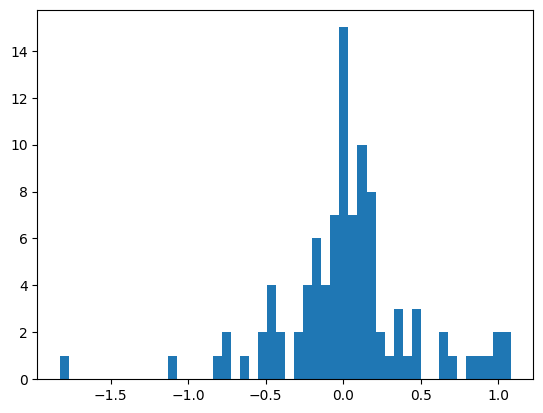

In [133]:
# print(linear.weight_gradient_descent)
plt.hist(linear.weight_gradient_descent, bins=50)
plt.show()

P2.4 Implement the ```learning_with_closed_form``` function in the ```LinearRegressor``` class, and describe your implementation. (5 point)

answer here

In [134]:
time_start = time.time()
linear.learning_with_closed_form(X, y)
print(f"Time elapsed: {time.time() - time_start}")
print(f"Final loss: {RSSloss(X, y, linear.weight_closed_form)}")

Time elapsed: 0.0
Final loss: 3.9832226295671455e-24


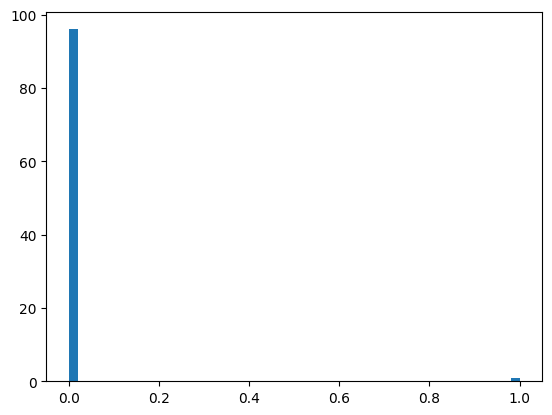

In [135]:
# print(linear.weight_closed_form)
plt.hist(linear.weight_closed_form, bins=50)
plt.show()

---

### P3. Ridge Regression (15 point)
#### P3.1 Implement the ```learning_with_coordinate_descent``` function in the ```RidgeRegressor``` class, and describe your implementation. (5 point)

Answer here

Time elapsed: 2.440642833709717
Final loss: 3.3812866454755754


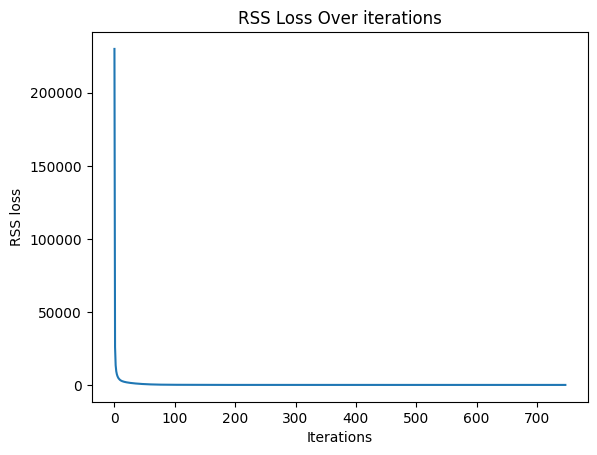

In [136]:
ridge = RidgeRegressor(tau=1e-5, dim=X.shape[1], lam=15)

time_start = time.time()
ridge.learning_with_coordinate_descent(X, y)
print(f"Time elapsed: {time.time() - time_start}")
print(f"Final loss: {ridge.losses[-1]}")
ridge.loss_history()

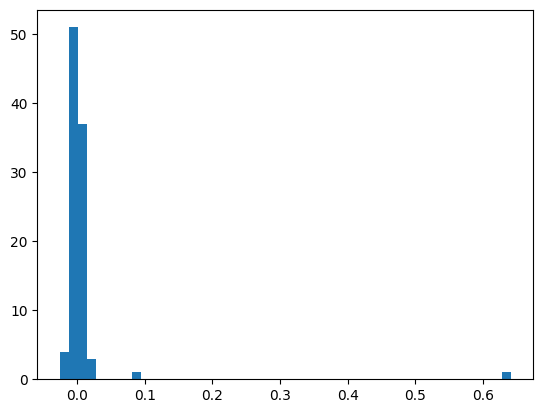

In [137]:
# print(ridge.weight_coordinate_descent)
plt.hist(ridge.weight_coordinate_descent, bins=50)
plt.show()

#### P3.2 Implement the ```learning_with_gradient_descent``` function in the ```RidgeRegressor``` class, and describe your implementation. (5 point)

Answer here

Time elapsed: 0.9990658760070801
Final loss: 3.275215852437846


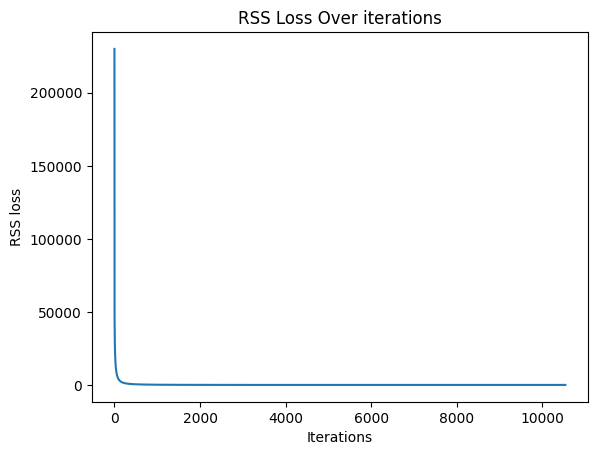

In [138]:
time_start = time.time()
losses_grad = ridge.learning_with_gradient_descent(X, y)
print(f"Time elapsed: {time.time() - time_start}")
print(f"Final loss: {ridge.losses[-1]}")
ridge.loss_history()

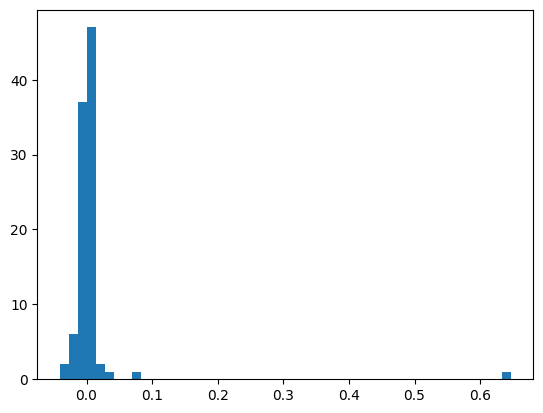

In [139]:
# print(ridge.weight_gradient_descent)
plt.hist(ridge.weight_gradient_descent, bins=50)
plt.show()

#### P3.3 Implement the ```learning_with_closed_form``` function in the ```RidgeRegressor``` class, and describe your implementation. (5 point)

Answer here

In [140]:
time_start = time.time()
ridge.learning_with_closed_form(X, y)
print(f"Time elapsed: {time.time() - time_start}")
print(f"Final loss: {RSSloss(X, y, ridge.weight_closed_form)}")

Time elapsed: 0.0020017623901367188
Final loss: 3.380710319573134


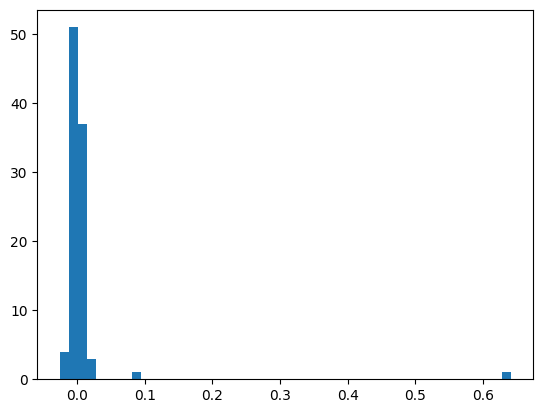

In [141]:
# print(ridge.weight_closed_form)
plt.hist(ridge.weight_closed_form, bins=50)
plt.show()

---

### P4. Lasso Regression (5 point)

#### P4.1 Implement the ```LassoRegressor``` class, and describe your implementation. Suppose that other conditions are the same as **P2**. Note that the regularization part is only different from Ridge regressior. (5 point)
#### Note that, we will use unnormalized features. Please refer the lecture note. 

Answer here

Time elapsed: 1.341796636581421
Final loss: 0.12550785276761225


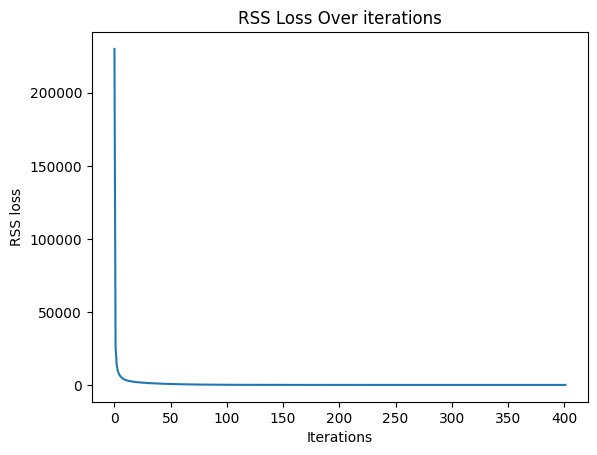

In [142]:
lasso = LassoRegressor(tau=1e-3, dim=X.shape[1], lam=5)

time_start = time.time()
losses = lasso.learning_with_coordinate_descent(X, y)
print(f"Time elapsed: {time.time() - time_start}")
print(f"Final loss: {lasso.losses[-1]}")
lasso.loss_history()

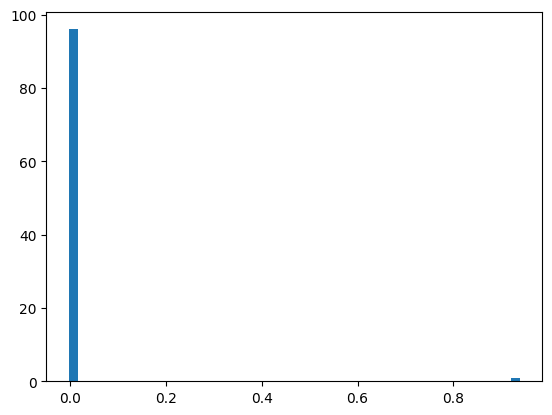

In [143]:
# print(lasso.weight_coordinate_descent)
plt.hist(lasso.weight_coordinate_descent, bins=50)
plt.show()

---

### P5. Elastic Regression (10 point)
#### P5.1 Implement the ```ElasticRegressor``` class, and describe your implementation. (10 point)
#### Note that **you should write the derivation process of threshold in your answer.** 

$$
\mathrm{Total~cost}=RSS(w)+\lambda\left( \alpha\sum_j\lvert w_j \rvert + (1-\alpha)\sum_j w_j^2 \right)
$$

answer here

Time elapsed: 1.2533221244812012
Final loss: 0.3405343512492435


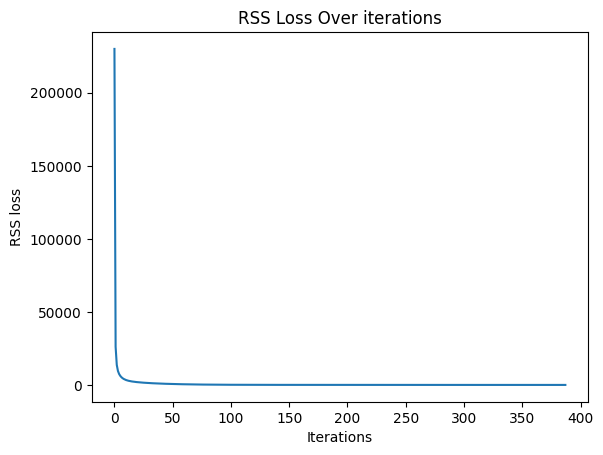

In [144]:
elastic = ElasticNetRegressor(tau=1e-3, dim=X.shape[1], lam=5, alpha=0.5)

time_start = time.time()
losses = elastic.learning_with_coordinate_descent(X, y)
print(f"Time elapsed: {time.time() - time_start}")
print(f"Final loss: {elastic.losses[-1]}")

elastic.loss_history()

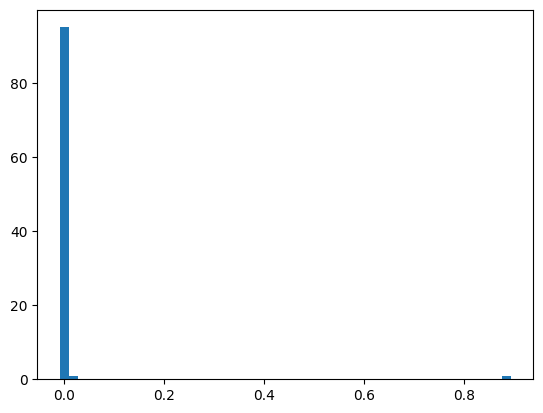

In [145]:
# print(elastic.weight_coordinate_descent)
plt.hist(elastic.weight_coordinate_descent, bins=50)
plt.show()

---

### P6. Analysis (45 point)

In [146]:
test_data_path = 'crime-test.csv'
test_dataset = Dataset(test_data_path)

   population  householdsize  agePct12t21  agePct12t29  agePct16t24  \
0       -0.14           0.35        -0.41        -0.10        -0.46   
1        0.02          -0.45        -0.22        -0.24        -0.40   
2       -0.45           0.28        -0.16         0.18        -0.46   
3        0.02          -0.27        -0.67        -0.51        -0.58   
4       -0.22           1.20         3.71         3.53         3.99   

   agePct65up  numbUrban  pctUrban  medIncome  pctWWage  ...  PctForeignBorn  \
0       -1.41      -0.11      0.48       1.43      1.70  ...           -0.24   
1       -0.19       0.12      0.68      -0.29      0.06  ...           -0.80   
2       -1.25      -0.34      0.68       0.14      1.54  ...           -0.67   
3       -0.69       0.12      0.68       0.95      0.67  ...            0.54   
4       -1.19      -0.11      0.68      -1.25      0.45  ...            0.54   

   PctBornSameState  PctSameHouse85  PctSameCity85  PctSameState85  LandArea  \
0           

In [147]:
X_test, y_test = test_dataset.parse_data(dataset.features)
print(f"shape of X: {X_test.shape}, shape of y: {y_test.shape}")

shape of X: (399, 97), shape of y: (399,)


#### P6.1 Observe training and test errors over the number of train data. Discuss the effect of the number of dataset. (5 point)

Answer here

In [148]:
X_100,y_100=dataset.gather_data(X,y,100)
print(f"shape of X_100: {X_100.shape}, shape of y: {y_100.shape}")

shape of X_100: (100, 97), shape of y: (100,)


Final loss trained with 100 data   : 0.5704269925120061
Final loss trained with all data   : 1.1120449930206417


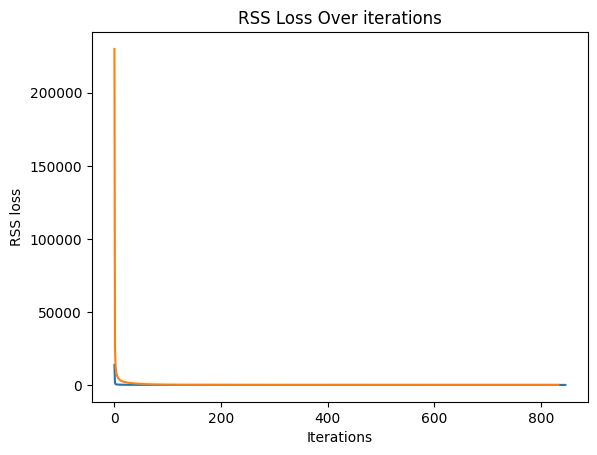

In [149]:
linear_100 = LinearRegressor(tau=1e-3, dim=X_100.shape[1])
linear_all = LinearRegressor(tau=1e-3, dim=X.shape[1])

linear_100.learning_with_coordinate_descent(X_100, y_100)
linear_all.learning_with_coordinate_descent(X, y)

print(f"Final loss trained with 100 data   : {linear_100.losses[-1]}")
print(f"Final loss trained with all data   : {linear_all.losses[-1]}")

linear_100.loss_history()
linear_all.loss_history()


In [150]:
linear_100_test_error=RSSloss(X_test,y_test,linear_100.weight_coordinate_descent)
linear_all_test_error=RSSloss(X_test,y_test,linear_all.weight_coordinate_descent)

print(f"Test Error Trained with 100 data     : {linear_100_test_error:.4f}")
print(f"Test Error Trained with Entire data  : {linear_all_test_error:.4f}")

Test Error Trained with 100 data     : 291.9100
Test Error Trained with Entire data  : 0.2605


---

#### You observed that increasing the amount of data can help prevent overfitting. However, in real-world scenarios, obtaining sufficient data is often challenging. Therefore, **regularization techniques are used to address overfitting.**

#### P6.2 Observe the training and test errors of the regressors, compare the linear regressor with the others and discuss the effect of regularization. If some empirical results are different from way you expected, perform toy experments to demonstrate what you're thinking for the reason. (10 point)

answer here

In [151]:
X_half,y_half=dataset.gather_data(X,y,800)
print(f"shape of X: {X_half.shape}, shape of y: {y_half.shape}")

shape of X: (800, 97), shape of y: (800,)


Final loss of Linear regressor  : 0.7944
Final loss of Ridge regressor   : 3.6185
Final loss of Lasso regressor   : 0.2211
Final loss of Elastic regressor : 0.5339


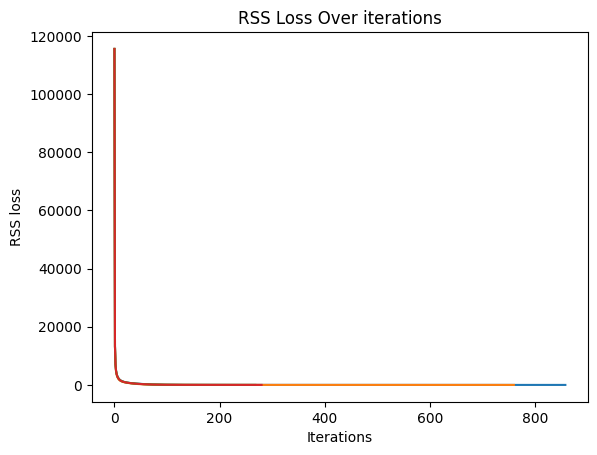

In [152]:
linear_half = LinearRegressor(tau=1e-3, dim=X_half.shape[1])
ridge_half = RidgeRegressor(tau=1e-5, dim=X_half.shape[1], lam=15)
lasso_half = LassoRegressor(tau=1e-3, dim=X_half.shape[1], lam=5)
elastic_half = ElasticNetRegressor(tau=1e-3, dim=X_half.shape[1], lam=5, alpha=0.5)

linear_half.learning_with_coordinate_descent(X_half, y_half)
ridge_half.learning_with_coordinate_descent(X_half, y_half)
lasso_half.learning_with_coordinate_descent(X_half, y_half)
elastic_half.learning_with_coordinate_descent(X_half, y_half)

print(f"Final loss of Linear regressor  : {linear_half.losses[-1]:.4f}")
print(f"Final loss of Ridge regressor   : {ridge_half.losses[-1]:.4f}")
print(f"Final loss of Lasso regressor   : {lasso_half.losses[-1]:.4f}")
print(f"Final loss of Elastic regressor : {elastic_half.losses[-1]:.4f}")

linear_half.loss_history()
ridge_half.loss_history()
lasso_half.loss_history()
elastic_half.loss_history()

In [153]:
linear_half_test_error=RSSloss(X_test,y_test,linear_half.weight_coordinate_descent)
ridge_half_test_error=RSSloss(X_test,y_test,ridge_half.weight_coordinate_descent)
lasso_half_test_error=RSSloss(X_test,y_test,lasso_half.weight_coordinate_descent)
elastic_half_test_error=RSSloss(X_test,y_test,elastic_half.weight_coordinate_descent)

print(f"Test Error of Linear (half) regressor   : {linear_half_test_error:.4f}")
print(f"Test Error of Linear (all) regressor    : {linear_all_test_error:.4f}")
print(f"Test Error of Ridge regressor           : {ridge_half_test_error:.4f}")
print(f"Test Error of Lasso regressor           : {lasso_half_test_error:.4f}")
print(f"Test Error of Elastic regressor         : {elastic_half_test_error:.4f}")

Test Error of Linear (half) regressor   : 0.4641
Test Error of Linear (all) regressor    : 0.2605
Test Error of Ridge regressor           : 2.2740
Test Error of Lasso regressor           : 0.1102
Test Error of Elastic regressor         : 0.2774


#### P6.3 Observe the magnitude of the coefficients across the regressors. Discuss the effect of regularization. (10 point)

Answer here

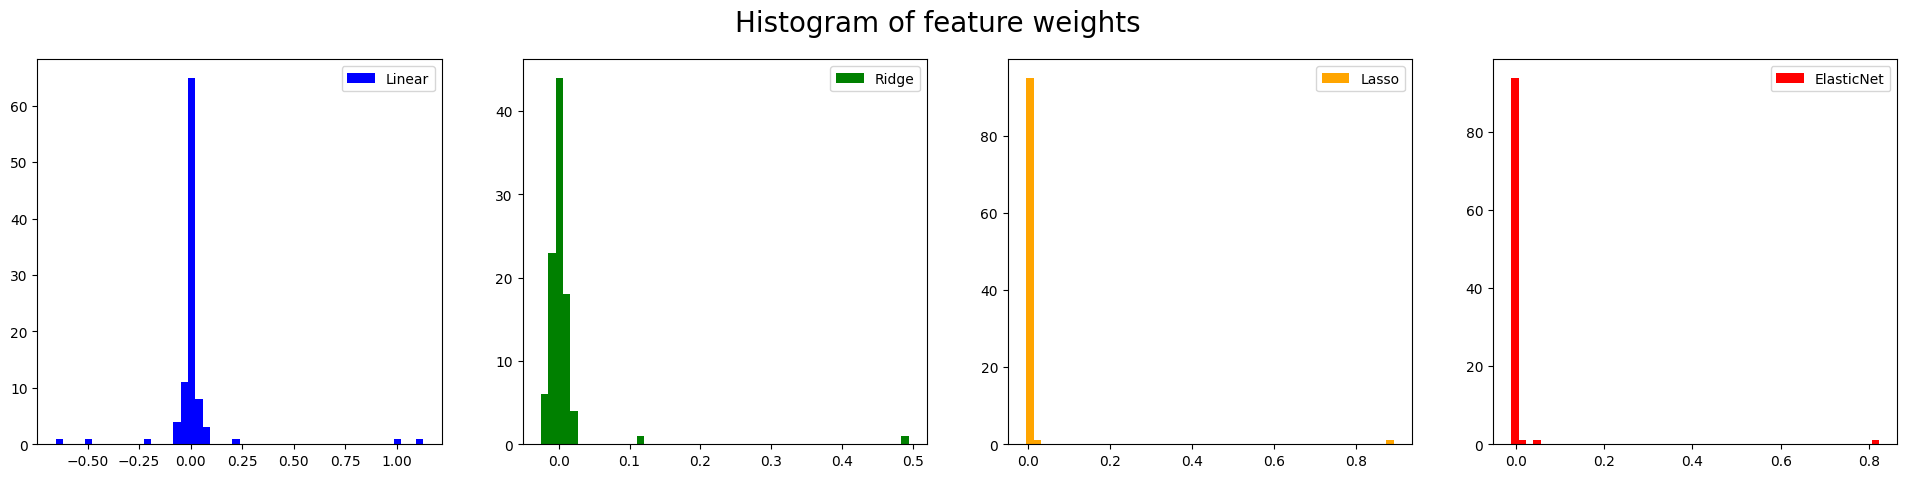

In [154]:
plt.figure(figsize=[24, 5])
plt.suptitle('Histogram of feature weights', fontsize=20)

plt.subplot(1, 4, 1)
plt.hist(linear_half.weight_coordinate_descent, bins=50, color='blue', label='Linear')
plt.legend()

plt.subplot(1, 4, 2)
plt.hist(ridge_half.weight_coordinate_descent, bins=50, color='green', label='Ridge')
plt.legend()

plt.subplot(1, 4, 3)
plt.hist(lasso_half.weight_coordinate_descent, bins=50, color='orange', label='Lasso')
plt.legend()

plt.subplot(1, 4, 4)
plt.hist(elastic_half.weight_coordinate_descent, bins=50, color='red', label='ElasticNet')
plt.legend()

plt.show()

---

#### P6.4 Explain and compare three regression methods (Ridge, Lasso, and Elastic Net). (10 point)

answer here

---

#### P6.5 Observe training and test errors over the value of $\lambda$. Discuss the effect of the tuning parameter $\lambda$. (10 point)

answer here

In [155]:
def stack_weight_over_lambda(X, y, model_type, tau, dim, lambda_list):
    stacked_weight = np.zeros([len(lambda_list), X.shape[1]])
    for i in range(len(lambda_list)):
        model = eval(model_type + 'Regressor')(tau=tau, dim=dim, lam=lambda_list[i])
        model.learning_with_coordinate_descent(X, y)
        stacked_weight[i, :] = model.weight_coordinate_descent
    return stacked_weight

def compute_errors(X, y, lambda_list, weights):
    assert len(lambda_list) == len(weights)
    rss_errors = []
    for i in range(len(lambda_list)):
        error = RSSloss(X, y, weights[i, :])
        rss_errors.append(error)
    return rss_errors

In [156]:
lambda_list = [i for i in range(0, 201, 5)]
print(lambda_list)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200]


In [157]:
stacked_weight_ridge = stack_weight_over_lambda(X, y, 'Ridge', 1e-3, X.shape[1], lambda_list)
stacked_weight_lasso = stack_weight_over_lambda(X, y, 'Lasso', 1e-3, X.shape[1], lambda_list)
stacked_weight_elsatic = stack_weight_over_lambda(X, y, 'ElasticNet', 1e-3, X.shape[1], lambda_list)

In [158]:
training_errors_ridge = compute_errors(X, y, lambda_list, stacked_weight_ridge)
training_errors_lasso = compute_errors(X, y, lambda_list, stacked_weight_lasso)
training_errors_elastic = compute_errors(X, y, lambda_list, stacked_weight_elsatic)

<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
C:\Users\minsu\AppData\Local\Temp\ipykernel_12880\174531800.py:6: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f"Training error over $\lambda$", fontsize=30)
C:\Users\minsu\AppData\Local\Temp\ipykernel_12880\174531800.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$', fontsize=20)


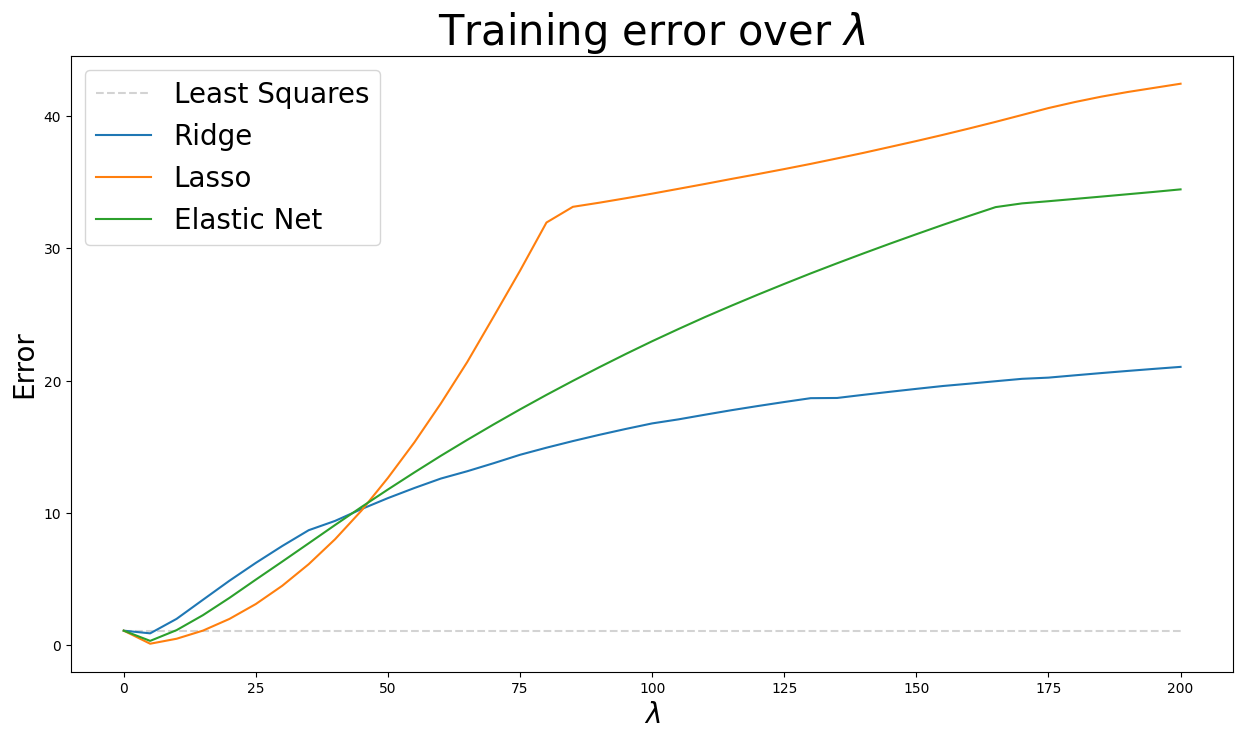

In [159]:
plt.figure(figsize=[15, 8])
plt.plot(lambda_list, [training_errors_lasso[0] for _ in range(len(training_errors_lasso))], label='Least Squares', linestyle='--', color='lightgrey')
plt.plot(lambda_list, training_errors_ridge, label='Ridge')
plt.plot(lambda_list, training_errors_lasso, label='Lasso')
plt.plot(lambda_list, training_errors_elastic, label='Elastic Net')
plt.title(f"Training error over $\lambda$", fontsize=30)
plt.xlabel('$\lambda$', fontsize=20)
plt.ylabel('Error', fontsize=20, rotation=90)
plt.legend(fontsize=20)
plt.show()

In [160]:
test_errors_ridge = compute_errors(X_test, y_test, lambda_list, stacked_weight_ridge)
test_errors_lasso = compute_errors(X_test, y_test, lambda_list, stacked_weight_lasso)
test_errors_elastic = compute_errors(X_test, y_test, lambda_list, stacked_weight_elsatic)

<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
C:\Users\minsu\AppData\Local\Temp\ipykernel_12880\549259943.py:6: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f"Test error over $\lambda$", fontsize=30)
C:\Users\minsu\AppData\Local\Temp\ipykernel_12880\549259943.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$', fontsize=20)


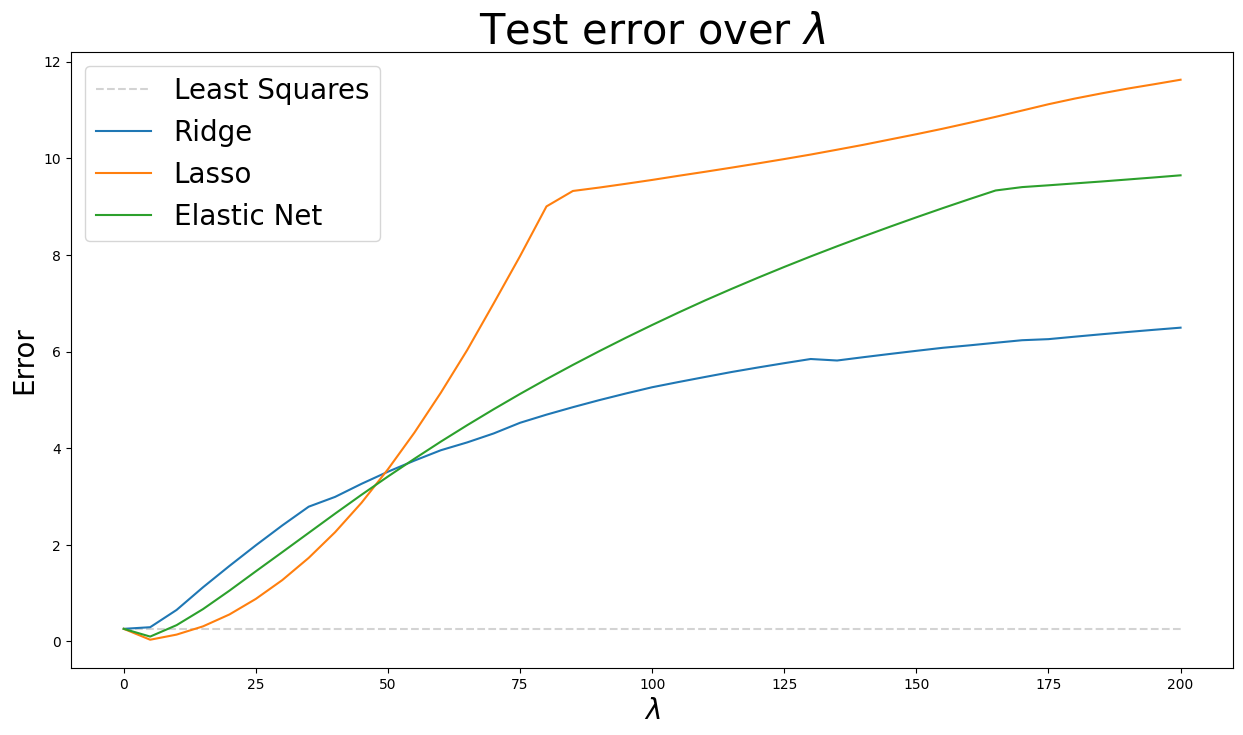

In [161]:
plt.figure(figsize=[15, 8])
plt.plot(lambda_list, [test_errors_lasso[0] for _ in range(len(test_errors_lasso))], label='Least Squares', linestyle='--', color='lightgrey')
plt.plot(lambda_list, test_errors_ridge, label='Ridge')
plt.plot(lambda_list, test_errors_lasso, label='Lasso')
plt.plot(lambda_list, test_errors_elastic, label='Elastic Net')
plt.title(f"Test error over $\lambda$", fontsize=30)
plt.xlabel('$\lambda$', fontsize=20)
plt.ylabel('Error', fontsize=20, rotation=90)
plt.legend(fontsize=20)
plt.show()